In [10]:
import tqdm
from tqdm import tqdm_notebook

import time

import numpy as np
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d.axes3d as axes3d

import matplotlib.ticker as ticker

In [11]:
# import warnings
# warnings.filterwarnings('ignore')

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
import os

In [32]:
def get_df(num_models, num_exper, file_names, model_names, y_axe,  y_axe_name, title, num_show = []):
    acc_num = 3
    dist_calc_num = 7
    df = []
    for i in range(len(file_names)):
        file_name = os.path.expanduser(file_names[i])
        data = np.genfromtxt(file_name, dtype=('U10','U10','U10',float,'U10',int,'U10',int,'U10',float)).tolist()
        cur_line = -1
        for mod in range(num_models[i]):
            for j in range(num_exper[i]):
                cur_line += 1
                if y_axe == 11:
                    df.append([1.00001 - data[cur_line][acc_num],
                               1 / data[cur_line][y_axe], model_names[i][mod], title])
                else:
                    df.append([1.00001 - data[cur_line][acc_num],
                              data[cur_line][y_axe], model_names[i][mod], title])

    df = pd.DataFrame(df, columns=["Error = 1 - Recall@1", y_axe_name, "algorithm", "title"])
#     print(df.shape)
    if len(num_show) > 0:
        it = 0
        itt = 0
        num_for_iloc = []
        model_names_list = []
        for i in range(len(file_names)):
            for mod in range(len(model_names[i])):
                model_names_list.append(model_names[i][mod])
        allowed_set = set()
        same_dict = dict()
        for i in range(len(file_names)):
            for mod in range(len(model_names[i])):
                if itt in num_show:
                    allowed_set.add(model_names_list[i])
                    for j in range(num_exper[i]):
                        num_for_iloc.append(it)
                        it += 1
                else:
                    it += num_exper[i]
                itt += 1
    df = df.iloc[num_for_iloc]
    
    return df

In [33]:
def show_results(frames, title, y_axe_name, x_log=True, y_log=False,
                      dims=(18, 12), save=False, file_name='trash'):
    size = len(frames)
    ylim = [[500, 5000], [0, 1000],[0, 1000],[0, 1000]]
    a4_dims = dims
    fig, axs = plt.subplots(2, 2, figsize=a4_dims)
    for i in range(2):
        for j in range(2):
            num = i * 2 + j
            if i + j == 2:
                sns.lineplot(x="Error = 1 - Recall@1", y=y_axe_name,hue="algorithm",
                              markers=True, style="algorithm", dashes=False,
                              data=frames[num], ax=axs[i, j], linewidth=3, ms=15)
            else:
                sns.lineplot(x="Error = 1 - Recall@1", y=y_axe_name,hue="algorithm",
                              markers=True, style="algorithm", dashes=False,
                              data=frames[num], ax=axs[i, j], legend=False, linewidth=3, ms=15)
            
            axs[i, j].set_title(title[num], size='30')

            lx = axs[i, j].get_xlabel()
            ly = axs[i, j].get_ylabel()
            axs[i, j].set_xlabel(lx, fontsize=30)
            axs[i, j].set_ylabel(ly, fontsize=30)
            axs[i, j].tick_params(axis='both', which='both', labelsize=25)
            axs[i, j].set_ymargin(0.075)
            if i == 0:
                axs[i, j].set_xlabel('')
            if j == 1:
                axs[i, j].set_ylabel('')
            
    plt.legend(loc=2, bbox_to_anchor=(1.05, 1, 0.5, 0.5), fontsize='30', markerscale=3, borderaxespad=0.)
    if y_log:
        for i in range(2):
            for j in range(2):
                axs[i, j].set(yscale="log")
            
    if x_log:
        for i in range(2):
            for j in range(2):
                axs[i, j].set(xscale="log")# num_exper = [6, 6, 3]
    
    if save:
        fig.savefig(file_name + ".pdf", bbox_inches='tight')

In [34]:
path = '~/Desktop/results/synthetic_n_10_6_d_'
# path = '~/results/synthetic_n_10_6_d_'

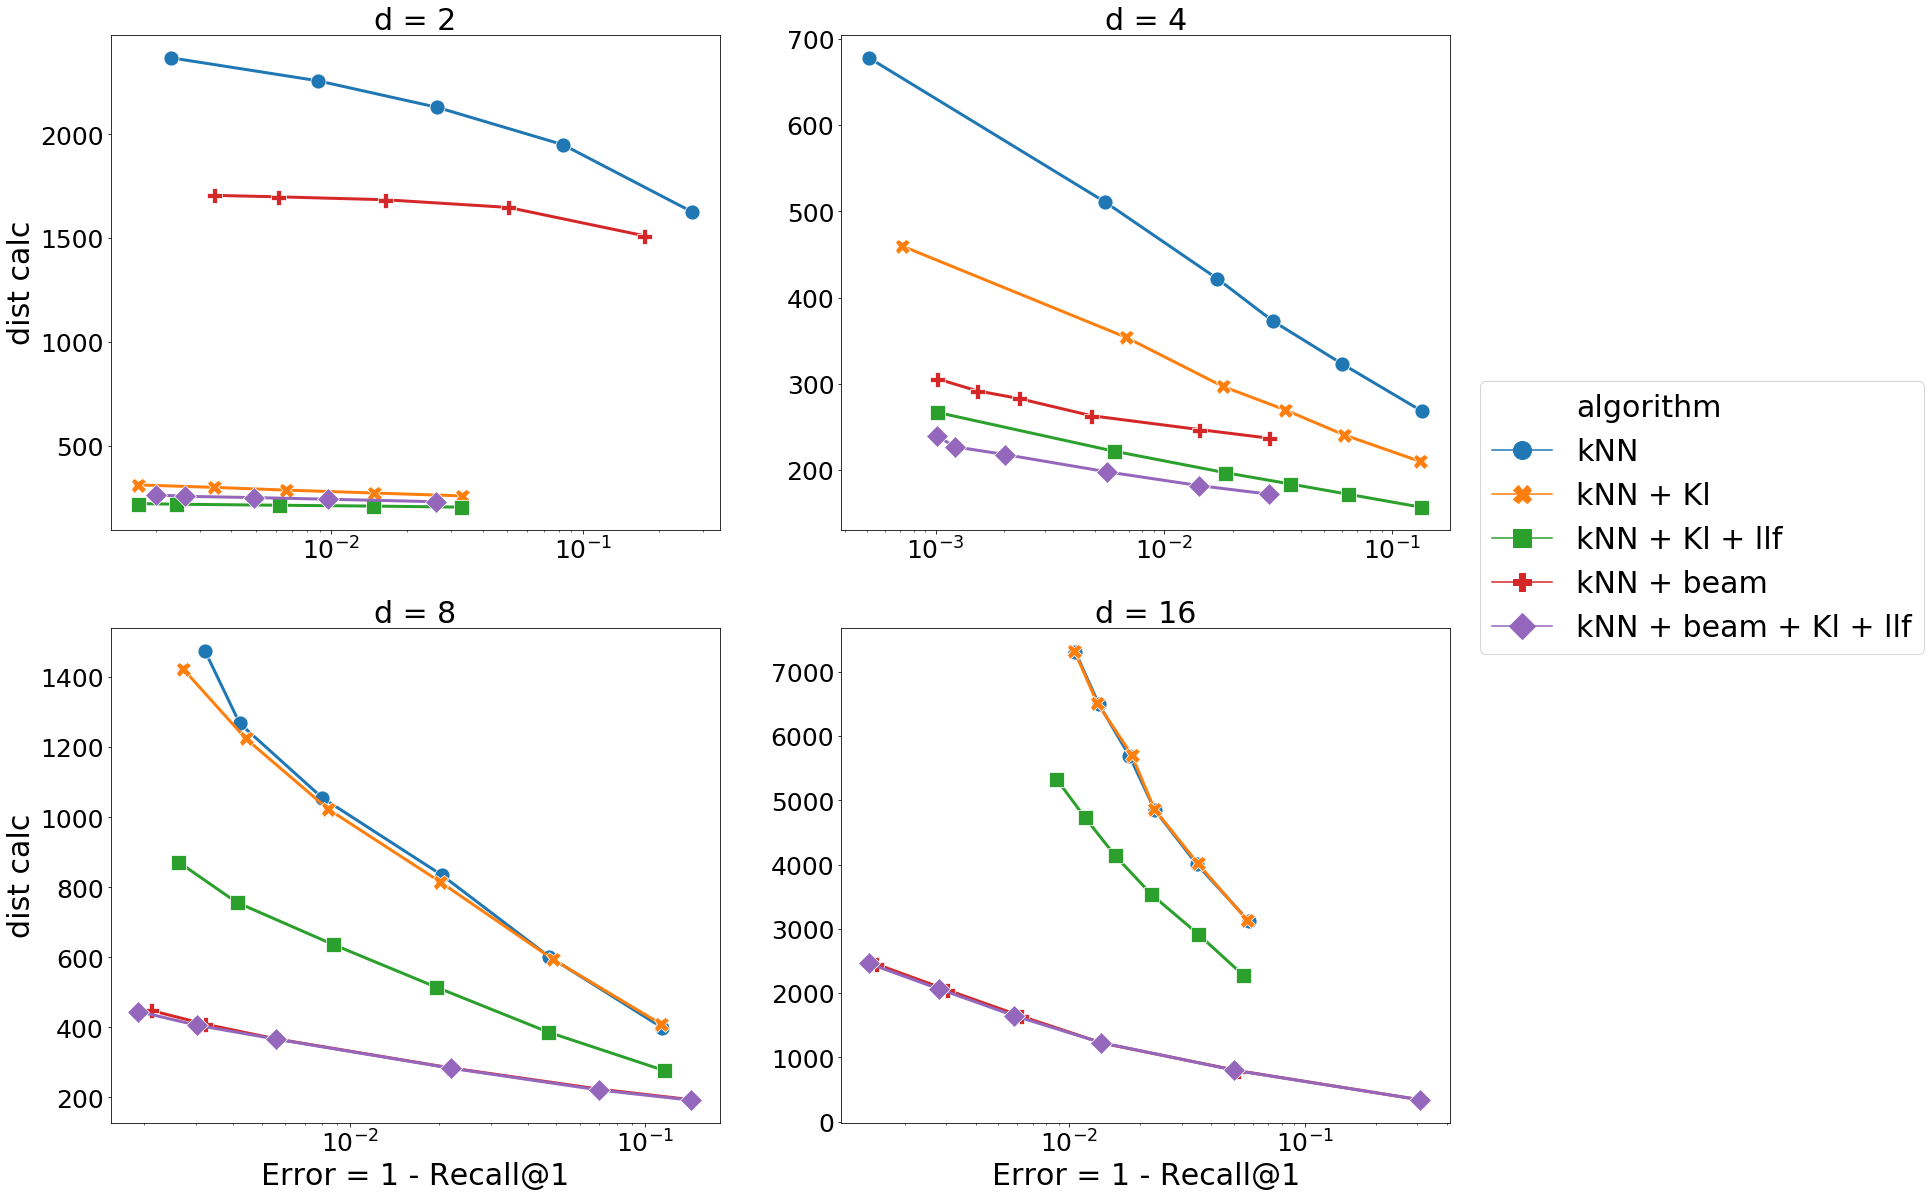

In [40]:
y_axe = 7
y_axe_name = "dist calc"
model_names = [['kNN', 'kNN + Kl', 'kNN + Kl + llf', 'kNN + beam', 'kNN + beam + Kl + llf']]
num_show = [0, 1, 2, 3, 4]

num_exper = [5]
num_models = [5]
file_names = [path + '3.txt']
df_2 = get_df(num_models, num_exper, file_names, model_names,  y_axe, y_axe_name, title="trash", num_show=num_show)

# print(df_2)

num_exper = [6]
num_models = [5]
file_names = [path + '5.txt']
df_4 = get_df(num_models, num_exper, file_names, model_names, y_axe, y_axe_name, title="trash", num_show=num_show)

num_exper = [6]
num_models = [5]
file_names = [path + '9.txt']
df_8 = get_df(num_models, num_exper, file_names, model_names, y_axe, y_axe_name, title="trash", num_show=num_show)
      
num_exper = [6]
num_models = [5]
file_names = [path + '17.txt']

df_16 = get_df(num_models, num_exper, file_names, model_names, y_axe, y_axe_name, title="trash", num_show=num_show)

frames = [df_2, df_4, df_8, df_16]
show_results_time(frames, ['d = 2', 'd = 4', 'd = 8', 'd = 16'],  y_axe_name,
                  y_log=False, x_log=True, dims=(24, 20),
                  save=True, file_name='synthetic_datasets_2_2_final')


## Supplementary

In [0]:
def get_df(num_models, num_exper, file_names, model_names, y_axe,  y_axe_name, title, num_show = []):
    acc_num = 3
    dist_calc_num = 7
    df = []
    for i in range(len(file_names)):
        file_name = os.path.expanduser(file_names[i])
        data = np.genfromtxt(file_name, dtype=('U10','U10','U10',float,'U10',int,'U10',int,'U10',float )).tolist()
#         print(len(data))
#         print(i)
#         print(data)
        for mod in range(num_models[i]):
            for j in range(num_exper[i]):
#                 print(len(model_names[i]), mod, j, i, num_models[i], mod + j*num_models[i])
                if y_axe == 9:
                    df.append([1.00001 - data[mod + j*num_models[i]][acc_num],
                               1 / data[mod + j*num_models[i]][y_axe], model_names[i][mod], title])
                else:
                    
                    df.append([1.00001 - data[mod + j*num_models[i]][acc_num],
                               data[mod + j*num_models[i]][y_axe], model_names[i][mod], title])

    df = pd.DataFrame(df, columns=["Error = 1 - Recall@1", y_axe_name, "algorithm", "title"])
#     print(df.shape)
    if len(num_show) > 0:
        it = 0
        itt = 0
        num_for_iloc = []
        model_names_list = []
        for i in range(len(file_names)):
            for mod in range(len(model_names[i])):
                model_names_list.append(model_names[i][mod])
        allowed_set = set()
        same_dict = dict()
        for i in range(len(file_names)):
            for mod in range(len(model_names[i])):
                if itt in num_show:
                    allowed_set.add(model_names_list[i])
                    for j in range(num_exper[i]):
                        num_for_iloc.append(it)
                        it += 1
                else:
                    it += num_exper[i]
                itt += 1
    df = df.iloc[num_for_iloc]
    
    return df

In [0]:
def show_results_dist_1_3(frames, title, markers, y_axe_name, x_log=True, y_log=False,
                      dims=(18, 12), save=False, file_name='trash'):
    size = len(frames)
    a4_dims = dims
    fig, axs = plt.subplots(1, 3, figsize=a4_dims)
    
    sns.set_context("paper", rc={"font.size":80})
    for i in range(3):
          sns.lineplot(x="Error = 1 - Recall@1", y=y_axe_name,hue="algorithm",
                       markers=markers, style="algorithm", dashes=False,
                       data=frames[i], ax=axs[i])
            
          axs[i].set_title(title[i], size='20')

          lx = axs[i].get_xlabel()
          ly = axs[i].get_ylabel()
          axs[i].set_xlabel(lx, fontsize=20)
          if i > 0:
              axs[i].set_ylabel('')

    if y_log:
        for i in range(3):
            axs[i].set(yscale="log")
            
    if x_log:
        for i in range(3):
            axs[i].set(xscale="log")
    if save:
        fig.savefig(file_name + ".pdf", bbox_inches='tight')

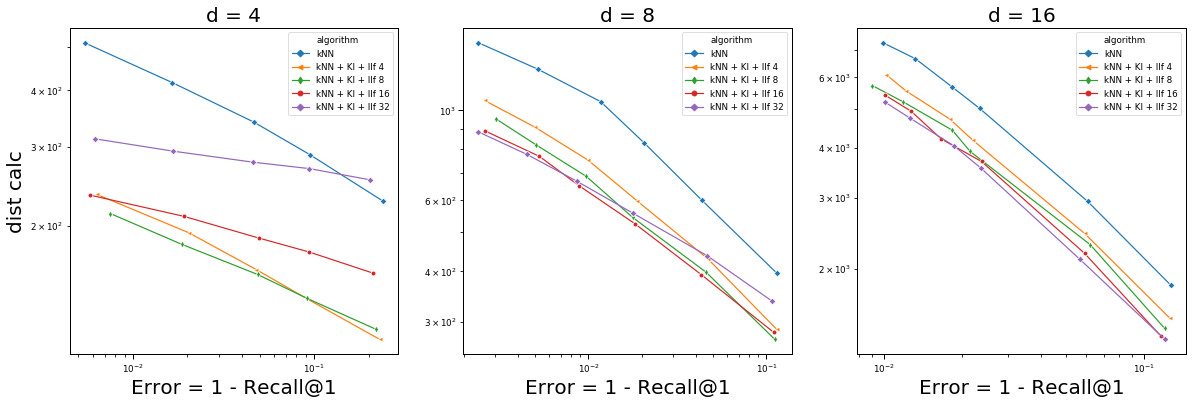

In [0]:
y_axe = 7
y_axe_name = "dist calc"
markers = ["D",  "<", "d", "o", "D",  "<", "d", "o", "p", "p", "p",]

num_exper = [5]
num_models = [6]
file_names = ['syn_optimal_kl_d_5.txt']
model_names = [['kNN', 'kNN + Kl + llf 4', 'kNN + Kl + llf 8', 'kNN + Kl + llf log', 'kNN + Kl + llf 16', 'kNN + Kl + llf 32']]
num_show = [ 0,  1,  2, 4, 5]
df_kl_4 = get_df(num_models, num_exper, file_names, model_names, y_axe, y_axe_name, title="trash", num_show=num_show)

num_exper = [6]
num_models = [6]
file_names = ['syn_optimal_kl_d_9.txt']
df_kl_8 = get_df(num_models, num_exper, file_names, model_names, y_axe, y_axe_name, title="trash", num_show=num_show)

num_exper = [6]
num_models = [6]
file_names = ['syn_optimal_kl_d_17.txt']
df_kl_16 = get_df(num_models, num_exper, file_names, model_names, y_axe, y_axe_name, title="trash", num_show=num_show)

frames = [df_kl_4, df_kl_8, df_kl_16]
show_results_dist_1_3(frames, ['d = 4', 'd = 8', 'd = 16'], markers,  y_axe_name,
                  y_log=True, x_log=True, dims=(20, 6),
                  save=True, file_name='suppl_figure_optimal_kl')


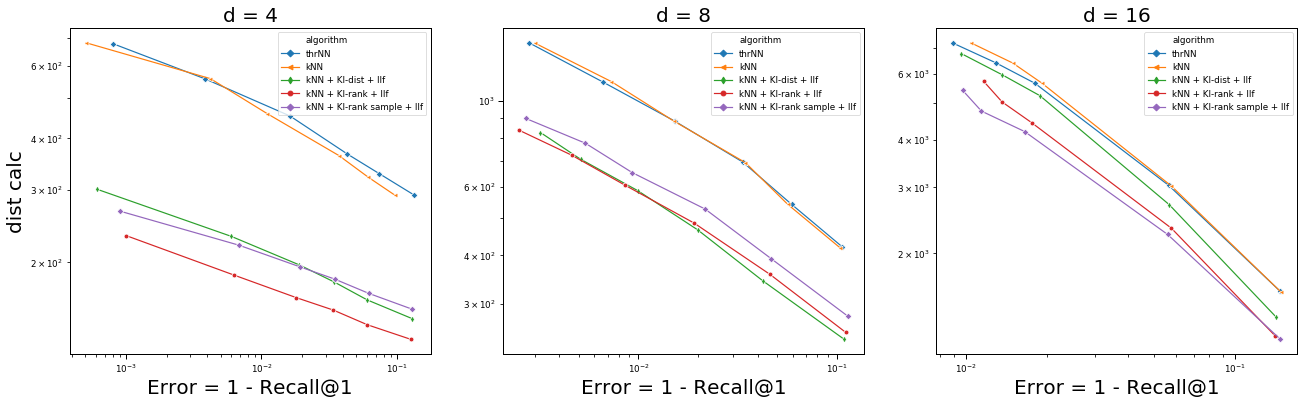

In [0]:
y_axe = 7
y_axe_name = "dist calc"
num_exper = [6, 6, 6, 6]
num_models = [2, 2, 2, 2]
file_names = ['syn_knn_k_vs_knn_thr_d_9.txt', 'syn_kl_dist_d_9.txt', 'syn_kl_numb_d_9.txt', 'syn_kl_numb_sqrt_d_9.txt']
model_names = [['thrNN', 'kNN'],
               ['knn_1', 'kNN + Kl-dist + llf'],
               ['knn_3', 'kNN + Kl-rank + llf'],
               ['knn_2', 'kNN + Kl-rank sample + llf']]
num_show = [ 0,  1,  3, 7,  5]
markers = ["D",  "<", "d", "o", "D",  "<", "d", "o", "p", "p", "p",]
df_knn_9 = get_df(num_models, num_exper, file_names, model_names,  y_axe, y_axe_name, title="trash", num_show=num_show)


# num_exper = [5,5,5,5]
num_exper = [6, 6, 6, 6]
num_models = [2, 2, 2, 2]
file_names = ['syn_knn_k_vs_knn_thr_d_5.txt', 'syn_kl_dist_d_5.txt', 'syn_kl_numb_d_5.txt', 'syn_kl_numb_sqrt_d_5.txt']
model_names = [['thrNN', 'kNN'],
               ['knn_1', 'kNN + Kl-dist + llf'],
               ['knn_3', 'kNN + Kl-rank + llf'],
               ['knn_2', 'kNN + Kl-rank sample + llf']]
num_show = [ 0,  1,  3, 7,  5]
df_knn_5 = get_df(num_models, num_exper, file_names, model_names,  y_axe, y_axe_name, title="trash", num_show=num_show)

num_exper = [5,5,5,5]
num_models = [1, 2, 2, 2]
file_names = ['syn_knn_k_vs_knn_thr_d_17.txt', 'syn_kl_dist_d_17.txt', 'syn_kl_numb_d_17.txt', 'syn_kl_numb_sqrt_d_17.txt']
model_names = [['thrNN'],
               ['kNN', 'kNN + Kl-dist + llf'],
               ['knn_3', 'kNN + Kl-rank + llf'],
               ['knn_2', 'kNN + Kl-rank sample + llf']]
num_show = [ 0,  1, 2, 4, 6]
df_knn_17 = get_df(num_models, num_exper, file_names, model_names,  y_axe, y_axe_name, title="trash", num_show=num_show)

frames = [df_knn_5, df_knn_9, df_knn_17]
show_results_dist_1_3(frames, ['d = 4', 'd = 8', 'd = 16'], markers,  y_axe_name,
                  y_log=True, x_log=True, dims=(22, 6),
                  save=True, file_name='suppl_figure_knn')
